In [3]:
import pandas as pd
import cv2
import os
from collections import defaultdict
from sklearn.model_selection import train_test_split
from skimage import feature
import numpy as np

#defining LBP algorithm
def extract_lbp_features(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Compute LBP features
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method='uniform')
    
    # Calculate the histogram of LBP features
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)  # Normalize the histogram
    
    return hist


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Left Hand-20230918T155734Z-001/Left Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesL = sorted(image_filenames)
left_label=[int(i[:3]) for i in sorted_image_filenamesL]
left = defaultdict(list)
j=0
for i in left_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesL[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    left[i].append(extract_lbp_features(image))
    j+=1

In [5]:
print(left[1])

[array([0.05328802, 0.03581458, 0.01641927, 0.00973646, 0.00739115,
       0.00638802, 0.00627969, 0.00705   , 0.00825833, 0.01054844,
       0.01465521, 0.02209062, 0.02812812, 0.02162344, 0.01401458,
       0.0102625 , 0.00764427, 0.00671042, 0.00603333, 0.00668698,
       0.00755   , 0.01067344, 0.0184349 , 0.03803906, 0.06617083,
       0.56010833]), array([0.05538021, 0.03645208, 0.01717396, 0.01008802, 0.00720677,
       0.00596615, 0.0057474 , 0.0062375 , 0.00744219, 0.00943333,
       0.01325729, 0.01991562, 0.02558698, 0.01990625, 0.01278646,
       0.00926719, 0.00698437, 0.00623854, 0.00565833, 0.00623802,
       0.00737396, 0.01081823, 0.019     , 0.03884271, 0.06719271,
       0.56980573]), array([0.05186458, 0.03526198, 0.01588333, 0.00948542, 0.00729948,
       0.0064375 , 0.00633437, 0.00736302, 0.0088974 , 0.01168385,
       0.01634583, 0.02444167, 0.0306349 , 0.02337604, 0.01520052,
       0.01104323, 0.00821979, 0.0069974 , 0.00621823, 0.00658125,
       0.00741354, 

In [6]:
print(len(left[1][0]))

26


In [7]:
from collections import defaultdict
image_dir = r'/kaggle/input/palmprint2/Right Hand-20230918T155917Z-001/Right Hand'
import cv2
# List all files in the directory
all_files = os.listdir(image_dir)

# Filter out only the image filenames
image_filenames = [filename for filename in all_files if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
sorted_image_filenamesR = sorted(image_filenames)
right_label=[int(i[:3]) for i in sorted_image_filenamesR]
right = defaultdict(list)
j=0
for i in right_label:
    image_path = os.path.join(image_dir, sorted_image_filenamesR[j])
    # Load image using cv2
    image = cv2.imread(image_path)
    right[i].append(extract_lbp_features(image))
    j+=1

Corrupt JPEG data: premature end of data segment


In [8]:
print(len(right[1][0]))

26


## Intra-Class Variability

In [9]:
import numpy as np
#Intra Variability
intra_left=defaultdict(list)
mean_left=defaultdict(list)
mean_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(left[i],axis=0)
    mean_left[i]=mean_lbp
    intra_left[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in left[i]]
intra_right=defaultdict(list)
for i in range(1,231):
    mean_lbp=np.mean(right[i],axis=0)
    mean_right[i]=mean_lbp
    intra_right[i]=[np.linalg.norm(mean_lbp - sample_lbp) for sample_lbp in right[i]]

In [10]:
print(intra_left[1])
print(intra_right[1])

[0.0013533111836597396, 0.012191706129853524, 0.008202822225819896, 0.0162905609174761, 0.01331039080998003, 0.008228812550983336]
[0.0015676211492922187, 0.007684763619245256, 0.0021446076799019635, 0.005464190637100229, 0.016372870295268925]


## Inter-Class Variability

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
print("Left Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_left.values()))))
print("Left Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_left.values()))))
print("\nRight Hand - Mean Inter-class Distance:", np.mean(euclidean_distances(list(mean_right.values()))))
print("Right Hand - Standard Deviation of Inter-class Distance:", np.std(euclidean_distances(list(mean_right.values()))))

Left Hand - Mean Inter-class Distance: 0.01959017974191824
Left Hand - Standard Deviation of Inter-class Distance: 0.013177435214765507

Right Hand - Mean Inter-class Distance: 0.019668804443975882
Right Hand - Standard Deviation of Inter-class Distance: 0.012980639324452528


In [12]:
print(len(mean_left),len(mean_right))
print(mean_left[1])

230 230
[0.05322031 0.03563168 0.01648316 0.00976241 0.00729948 0.00634245
 0.00618325 0.00697283 0.00824071 0.01063681 0.01484349 0.02248993
 0.02886641 0.02209757 0.01416042 0.01025356 0.00769462 0.00666458
 0.00601441 0.0065026  0.00745399 0.01070703 0.01837248 0.03800434
 0.06568394 0.55941753]


### Checking Inter-Class Variability for a particular person

#### At Threshold_1

In [13]:
checker=mean_left[1]
threshold_1=np.mean((euclidean_distances(list(mean_left.values()))))
k=[]
for i in range(2,231):
    k.append(np.linalg.norm(checker-mean_left[i]))
k<threshold_1

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [14]:
FP_1=len([1 for i in k<threshold_1 if i==True])
TN_1=len([0 for i in k<threshold_1 if i==False])
FPR_1=FP_1/(FP_1+TN_1)
h=[]
for c in range(1,6):
    h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))
TP_1=len([1 for c in h<threshold_1 if c==True])
FN_1=len([0 for c in h<threshold_1 if c==False])
TPR_1=TP_1/(TP_1+FN_1)
print('False Positive: ',FP_1)
print('True Negative: ',TN_1)
print('True Positive:',TP_1)
print('False Negative:',FN_1)
print('False Positive Rate: ',FPR_1)
print('True Positive Rate:',TPR_1)

False Positive:  85
True Negative:  144
True Positive: 5
False Negative: 0
False Positive Rate:  0.37117903930131
True Positive Rate: 1.0


In [15]:
threshold_1

0.01959017974191824

In [16]:
threshold_array = np.arange(threshold_1, 0, -0.0002)
FPR=[]
TPR=[]
for i in threshold_array:
    k=[]
    h=[]
    for j in range(2,231):
        k.append(abs(np.linalg.norm(checker-mean_left[j])))
    for c in range(1,6):
        h.append(abs(np.linalg.norm(left[1][c]-mean_left[1])))    
    FP=len([1 for c in k<i if c==True])
    TN=len([0 for c in k<i if c==False])
    TP=len([1 for c in h<i if c==True])
    FN=len([0 for c in h<i if c==False])
    FPR.append(FP/(FP+TN))
    TPR.append(TP/(TP+FN))

In [17]:
print(TPR)
print(FPR)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.37117903930131, 0.37117903930131, 0.37117903930131, 0.3624454148471616, 0.34934497816593885, 0.34497816593886466, 0.3406113537117904, 0.33624454148471616, 0.33624454148471616, 0.33624454148471616, 0.3231441048034934, 0.3231441048034934, 0.3231441048034934, 0.31877729257641924, 0.31877729257641924, 0.31877729257641924, 0.31004366812227074, 0.31004366812227074, 0.30131004366812225, 0.29694323144104806, 0.29694323144104806, 0.2925764192139738, 0.2838427947598253, 0.2794759825327511, 0.2794759825327511, 0

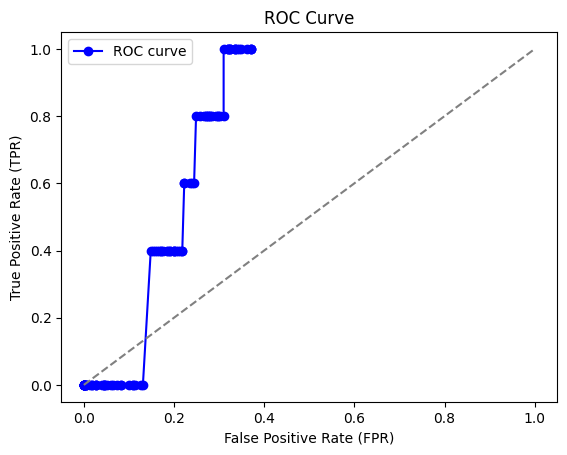

In [18]:
import matplotlib.pyplot as plt

# Hypothetical TPR and FPR values for different thresholds
# Replace these with actual values from your model
#thresholds = [0.01959017974191824, 0.019, 0.0185, 0.018, 0.0175]  # Example threshold values
#tpr_values = tpr  # Example TPR values corresponding to the thresholds
#fpr_values = fpr  # Example FPR values corresponding to the thresholds

# Plot ROC curve
plt.plot(FPR, TPR, color='b', marker='o', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()
